In [1]:
import pandas as pd # pandas will be referred to as pd below
import numpy
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [193]:
elec_use= pd.read_csv('electricity_use_per_person.csv')
median_age= pd.read_csv('median_age_years.csv')

In [194]:
elec_use = elec_use[['country', '1975','1980','1985','1990','1995','2000','2005','2010']]
elec_use = elec_use.dropna()

In [195]:
median_age = median_age[['country','1975','1980' ,'1985','1990','1995','2000','2005','2010']]

In [196]:
melt1 = pd.melt(elec_use, id_vars=["country"], value_vars=['1975','1980' ,'1985','1990','1995','2000','2005','2010'], value_name='Elec_usage')
melt2 = pd.melt(median_age, id_vars=["country"], value_vars=['1975','1980' ,'1985','1990','1995','2000','2005','2010'], value_name='Median_Age')
#melt2.set_index('country',inplace=True)

In [197]:
#melt2
#melt2[melt2["country"] == 'Turkey']
melt1[melt1["country"] == 'Turkey']

,country,variable,Elec_usage
99,Turkey,1975,359.0
208,Turkey,1980,496.0
317,Turkey,1985,660.0
426,Turkey,1990,930.0
535,Turkey,1995,1230.0
644,Turkey,2000,1650.0
753,Turkey,2005,2010.0
862,Turkey,2010,2490.0


In [198]:
melt2[melt2["country"] == 'Turkey']

,country,variable,Median_Age
169,Turkey,1975,19.6
353,Turkey,1980,20.0
537,Turkey,1985,21.0
721,Turkey,1990,22.1
905,Turkey,1995,23.5
1089,Turkey,2000,24.9
1273,Turkey,2005,26.6
1457,Turkey,2010,28.3


In [199]:
#melt1.set_index('country',inplace=True)
#melt2.set_index('country',inplace=True)
merged= pd.merge(melt1, melt2,how='inner', left_on=['country','variable'], right_on=['country','variable'])

In [200]:
merged[merged["country"] == 'Turkey']

,country,variable,Elec_usage,Median_Age
99,Turkey,1975,359.0,19.6
208,Turkey,1980,496.0,20.0
317,Turkey,1985,660.0,21.0
426,Turkey,1990,930.0,22.1
535,Turkey,1995,1230.0,23.5
644,Turkey,2000,1650.0,24.9
753,Turkey,2005,2010.0,26.6
862,Turkey,2010,2490.0,28.3


In [201]:
data = merged.rename(columns={'variable': 'Year', 'country': 'Country'})

In [202]:
data

,Country,Year,Elec_usage,Median_Age
0,Albania,1975,739.0,20.2
1,Algeria,1975,195.0,16.5
2,Angola,1975,127.0,16.6
3,Argentina,1975,1000.0,27.4
4,Australia,1975,4780.0,28.1
5,Austria,1975,3730.0,33.9
6,Bahrain,1975,2630.0,19.3
7,Bangladesh,1975,17.0,17.6
8,Belgium,1975,3890.0,34.3
9,Benin,1975,18.1,18.3


In [263]:
data[data["Country"] == 'Turkey']

,Country,Year,Elec_usage,Median_Age,ElecGroup,AgeGroup,AGE
99,Turkey,1975,359.0,19.6,2.0,"(18, 25]",0
208,Turkey,1980,496.0,20.0,2.0,"(18, 25]",0
317,Turkey,1985,660.0,21.0,2.0,"(18, 25]",0
426,Turkey,1990,930.0,22.1,2.0,"(18, 25]",0
535,Turkey,1995,1230.0,23.5,3.0,"(18, 25]",0
644,Turkey,2000,1650.0,24.9,3.0,"(18, 25]",1
753,Turkey,2005,2010.0,26.6,3.0,"(25, 32]",1
862,Turkey,2010,2490.0,28.3,3.0,"(25, 32]",1


In [204]:
print ('Elec. use per person ranges from '+ str(data['Elec_usage'].min())+' and to '+ str(data['Elec_usage'].max()) )
data['Elec_usage'].describe()

Elec. use per person ranges from 6.68 and to 51400.0


count      872.000000
mean      3270.140115
std       4805.859468
min          6.680000
25%        314.000000
50%       1175.000000
75%       4567.500000
max      51400.000000
Name: Elec_usage, dtype: float64

In [205]:
# Elec. use per person column keeps continuous quantitative variables.
# In order to create Elec. use per person groups, we need to generate partitions. 
# Below, we call the "cut " method. Note that the first cut is (7, 300]
data['ElecGroup']= pd.cut(data.Elec_usage, [7,300,1000,5000,10000,20000,55000]) 
# no need to sort the data frame.

print(len(data))
print(len(data['ElecGroup']))

872
872


In [206]:
data['ElecGroup']= data['ElecGroup'].astype('category')
data['ElecGroup'].describe()

count              871
unique               6
top       (1000, 5000]
freq               273
Name: ElecGroup, dtype: object

In [207]:
ElecGroup= data['ElecGroup'].value_counts(sort= False, normalize= True) 
# value_counts() should make more sense now
print(ElecGroup)

(7, 300]          0.246843
(300, 1000]       0.219288
(1000, 5000]      0.313433
(5000, 10000]     0.138921
(10000, 20000]    0.068886
(20000, 55000]    0.012629
Name: ElecGroup, dtype: float64


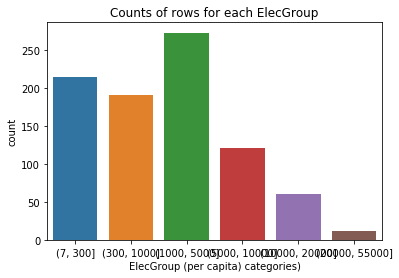

In [208]:
seaborn.countplot(x= 'ElecGroup', data= data)
plt.xlabel('ElecGroup (per capita) categories)')
plt.title('Counts of rows for each ElecGroup')
plt.show()

Text(0.5, 1.0, 'Counts of rows for each ElecGroup')

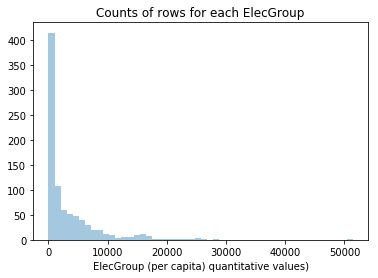

In [209]:
seaborn.distplot(data['Elec_usage'].dropna(), kde= False)
plt.xlabel('ElecGroup (per person) quantitative values)')
plt.title('Counts of rows for each ElecGroup')

In [210]:
print ('Median Age ranges from '+ str(data['Median_Age'].min())+' and to '+ str(data['Median_Age'].max()) )
data['Median_Age'].describe()

Median Age ranges from 14.3 and to 44.7


count    872.000000
mean      25.344839
std        7.639786
min       14.300000
25%       18.500000
50%       23.250000
75%       31.800000
max       44.700000
Name: Median_Age, dtype: float64

In [211]:
data['AgeGroup']= pd.cut(data.Median_Age, [8,18,25,32,40,50]) 

In [212]:
data['AgeGroup']= data['AgeGroup'].astype('category')
data['AgeGroup'].describe()

count          872
unique           5
top       (18, 25]
freq           303
Name: AgeGroup, dtype: object

In [213]:
MG= data['AgeGroup'].value_counts(sort= False, normalize= True)
print(MG)

(8, 18]     0.213303
(18, 25]    0.347477
(25, 32]    0.194954
(32, 40]    0.213303
(40, 50]    0.030963
Name: AgeGroup, dtype: float64


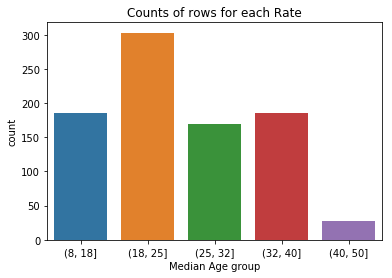

In [214]:
seaborn.countplot(x= 'AgeGroup', data= data)
plt.xlabel('Median Age group')
plt.title('Counts of rows for each Rate')
plt.show()

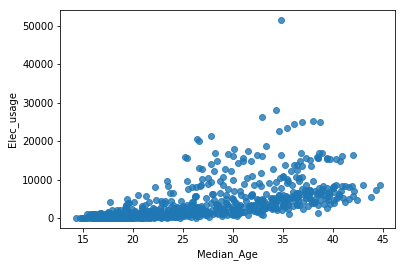

In [215]:
seaborn.regplot(x= "Median_Age", y= "Elec_usage", fit_reg= False, data= data)

In [216]:
MG= data['AgeGroup'].value_counts(sort= False, normalize= True)
print(MG)

(8, 18]     0.213303
(18, 25]    0.347477
(25, 32]    0.194954
(32, 40]    0.213303
(40, 50]    0.030963
Name: AgeGroup, dtype: float64


In [217]:
def AGE (row):
    if row['Median_Age'] < 24 :
        return 0
    else:
        return 1

In [218]:
data['AGE']= data.apply(lambda row : AGE(row), axis= 1)
# axis=1, tells python to apply this function to each row 
# Arbitrary functions can be applied along the axes of a DataFrame using the apply() method
data['AGE'].value_counts()

0    455
1    417
Name: AGE, dtype: int64

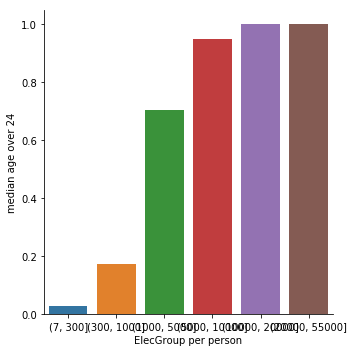

In [220]:
seaborn.factorplot(x= 'ElecGroup', y= 'AGE', data= data, kind= "bar", ci=None)
plt.xlabel('ElecGroup per person')
plt.ylabel('median age over 24')
plt.show()
# A categorical to categorical bar chart
# note that a bivariate graph displays a mean on the y-axis, 
# so categorical response variables should not have other than two levels, they should be coded as 1 and 0.
# Important: Below, the response variable gives us the proportion of the positive observations.

In [221]:
#7,300,1000,5000,10000,20000,55000
def ElecRangeGroup (row):
   if row['Elec_usage'] > 7.0 and row['Elec_usage']<= 300.0 :
      return 1
   if row['Elec_usage'] > 300.0 and row['Elec_usage']<= 1000.0 :
      return 2
   if row['Elec_usage'] > 1000.0 and row['Elec_usage']<= 5000.0 :
      return 3
   if row['Elec_usage'] > 5000.0 and row['Elec_usage']<= 10000.0 :
      return 4
   if row['Elec_usage'] > 10000.0 and row['Elec_usage']<= 20000.0 :
      return 5
   if row['Elec_usage'] > 20000.0 and row['Elec_usage']<= 55000.0 :
      return 6

In [222]:
data['ElecGroup'] = data.apply (lambda row: ElecRangeGroup (row),axis=1)

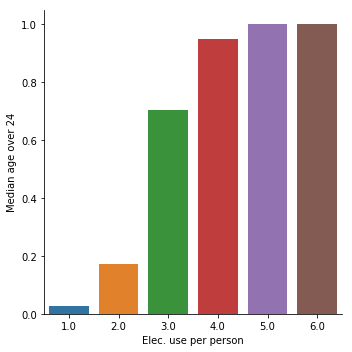

In [224]:
seaborn.factorplot(x= 'ElecGroup', y= 'AGE', data= data, kind= "bar", ci=None)
plt.xlabel('Elec. use per person catagory')
plt.ylabel('Median age over 24')
plt.show()

# PART II: Analysis

In [226]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

In [232]:
data3= data[['ElecGroup', 'Median_Age']]
print(data3)

     ElecGroup  Median_Age
0          2.0        20.2
1          1.0        16.5
2          1.0        16.6
3          2.0        27.4
4          3.0        28.1
5          3.0        33.9
6          3.0        19.3
7          1.0        17.6
8          3.0        34.3
9          1.0        18.3
10         1.0        18.6
11         2.0        19.5
12         3.0        19.6
13         3.0        33.7
14         1.0        18.4
15         5.0        27.5
16         2.0        21.5
17         1.0        20.4
18         2.0        17.8
19         1.0        17.8
20         1.0        17.9
21         2.0        19.3
22         1.0        17.6
23         2.0        22.3
24         3.0        27.4
25         3.0        32.7
26         3.0        33.0
27         2.0        17.0
28         1.0        18.1
29         1.0        19.2
..         ...         ...
842        3.0        41.6
843        5.0        31.8
844        3.0        39.4
845        4.0        25.9
846        1.0        18.1
8

## A) ANOVA 
### Please note that "GDPCat" is categorical, and  "Under_five_mortality" is numeric

In [233]:
model1= smf.ols(formula='Median_Age ~ C(ElecGroup)', data=data3)
# statsmodels.formula.api as smf
# ols: ordinary least squares regression
# first response var, and then explanatory variable. Note that C stands for the Categorical variable.

In [234]:
results= model1.fit()

In [235]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Median_Age   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     302.0
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          6.38e-187
Time:                        01:14:26   Log-Likelihood:                -2566.7
No. Observations:                 871   AIC:                             5145.
Df Residuals:                     865   BIC:                             5174.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              18.1972    

### POST-HOC TESTS ARE NEEDED: Which categories are different than others?

In [236]:
mc1 = multi.MultiComparison(data3['Median_Age'], data3['ElecGroup'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
 1.0    2.0    2.5452   1.1862   3.9042  True 
 1.0    3.0    9.7108   8.4646  10.9571  True 
 1.0    4.0   16.4268  14.8735   17.98   True 
 1.0    5.0   15.5161  13.5206  17.5116  True 
 1.0    6.0   15.9755  11.7506  20.2004  True 
 1.0    nan    1.2028  -12.4962 14.9018 False 
 2.0    3.0    7.1657   5.8764   8.4549  True 
 2.0    4.0   13.8816  12.2936  15.4696  True 
 2.0    5.0   12.9709  10.9483  14.9936  True 
 2.0    6.0   13.4303   9.1925  17.6682  True 
 2.0    nan   -1.3424  -15.0454 12.3606 False 
 3.0    4.0    6.7159   5.2233   8.2085  True 
 3.0    5.0    5.8053   3.8566   7.754   True 
 3.0    6.0    6.2647   2.0616  10.4677  True 
 3.0    nan   -8.5081  -22.2003  5.1842 False 
 4.0    5.0   -0.9106  -3.0686   1.2474 False 
 4.0    6.0   -0.4512  -4.7553   3.8528 False 
 4.0    nan   -15.224  -28.9476 -1.5004  True 
 5.0    6

### B) CHI SQUARE TEST OF INDEPENDENCE for CATEGORICAL TO CATEGORICAL VARIABLES

In [238]:
data4= data[['AGE', 'ElecGroup']]
print(data4)

     AGE  ElecGroup
0      0        2.0
1      0        1.0
2      0        1.0
3      1        2.0
4      1        3.0
5      1        3.0
6      0        3.0
7      0        1.0
8      1        3.0
9      0        1.0
10     0        1.0
11     0        2.0
12     0        3.0
13     1        3.0
14     0        1.0
15     1        5.0
16     0        2.0
17     0        1.0
18     0        2.0
19     0        1.0
20     0        1.0
21     0        2.0
22     0        1.0
23     0        2.0
24     1        3.0
25     1        3.0
26     1        3.0
27     0        2.0
28     0        1.0
29     0        1.0
..   ...        ...
842    1        3.0
843    1        5.0
844    1        3.0
845    1        4.0
846    0        1.0
847    1        4.0
848    1        4.0
849    1        3.0
850    1        4.0
851    1        4.0
852    1        2.0
853    0        1.0
854    1        5.0
855    1        4.0
856    0        3.0
857    0        1.0
858    1        3.0
859    0        1.0


In [239]:
# contingency table of observed counts
ct1=pd.crosstab(data4['AGE'], data4['ElecGroup'])
print (ct1) # ct1 is a two-dimentional array

ElecGroup  1.0  2.0  3.0  4.0  5.0  6.0
AGE                                    
0          209  158   81    6    0    0
1            6   33  192  115   60   11


In [240]:
# column percentages
colsum=ct1.sum(axis=0) # axis=0 to sum all columns
colpct=ct1/colsum
print(colpct)

ElecGroup       1.0       2.0       3.0       4.0  5.0  6.0
AGE                                                        
0          0.972093  0.827225  0.296703  0.049587  0.0  0.0
1          0.027907  0.172775  0.703297  0.950413  1.0  1.0



#### We are trying to find out if the mortality rate among different GDP categories is the same or not. Therefore column percentages make sense. (Explanatory variables on each column)

In [241]:
import scipy.stats

In [242]:
# chi-square
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)

chi-square value, p value, expected counts
(487.1052465055917, 4.84579097311198e-103, 5, array([[112.06659013,  99.55683123, 142.29850746,  63.07003444,
         31.27439724,   5.73363949],
       [102.93340987,  91.44316877, 130.70149254,  57.92996556,
         28.72560276,   5.26636051]]))


### Large X2 statistics and a small p-value states that there is a strong association between the explanatory variables and the response variables as opposed to the null hypothesis.


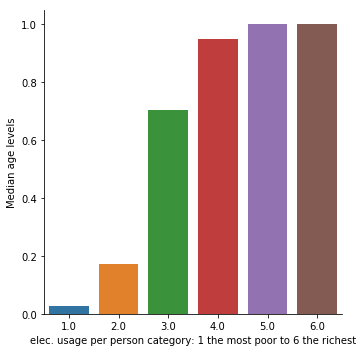

In [243]:
seaborn.factorplot(x= 'ElecGroup', y= 'AGE', data= data4, kind= "bar", ci=None)
plt.xlabel('elec. usage per person category: 1 the most poor to 6 the richest')
plt.ylabel('Median age levels')
plt.show()
# note that the y values are equal to the column percentages (colpct) for Mortal 1

### POST-HOC TESTS ARE NEEDED:  Which GDP Categories are different than the others?
### chi square post hoc test: Apply chi square for each pair (all combinations of them); test with adjusted p value (bonferroni adjustment p-value: p-value / number_of_comparions)
Here, we have 6 groups and there are 15 pairs; so the adjusted p-value is 0.05/15= 0,0033

In [245]:
# We need to run chi-square tests for each of the comparisons
recode_1v2 = {1: 1, 2: 2} # this is required because we are going to use only these two columns
data4['Elec_1v2']= data4['ElecGroup'].map(recode_1v2)

# contingency table of observed counts
table_1v2=pd.crosstab(data4['AGE'], data4['Elec_1v2'])
print (table_1v2)

# column percentages
colsum=table_1v2.sum(axis=0)
colpct=table_1v2/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_1v2= scipy.stats.chi2_contingency(table_1v2)
print (cs_1v2)

Elec_1v2  1.0  2.0
AGE               
0         209  158
1           6   33
Elec_1v2       1.0       2.0
AGE                         
0         0.972093  0.827225
1         0.027907  0.172775
chi-square value, p value, expected counts
(22.806297143283068, 1.7917765380037851e-06, 1, array([[194.34729064, 172.65270936],
       [ 20.65270936,  18.34729064]]))


#### Now, we need to run the above test for each of the remaining paired comparisons!

In [246]:
recode_1v3 = {1: 1, 3: 3}
data4['Elec_1v3']= data4['ElecGroup'].map(recode_1v3)

# contingency table of observed counts
table_1v3=pd.crosstab(data4['AGE'], data4['Elec_1v3'])
print (table_1v3)

# column percentages
colsum=table_1v3.sum(axis=0)
colpct=table_1v3/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_1v3= scipy.stats.chi2_contingency(table_1v3)
print (cs_1v3)

Elec_1v3  1.0  3.0
AGE               
0         209   81
1           6  192
Elec_1v3       1.0       3.0
AGE                         
0         0.972093  0.296703
1         0.027907  0.703297
chi-square value, p value, expected counts
(224.7521622551614, 8.315050688248716e-51, 1, array([[127.76639344, 162.23360656],
       [ 87.23360656, 110.76639344]]))


In [247]:
recode_1v4 = {1: 1, 4: 4}
data4['Elec_1v4']= data4['ElecGroup'].map(recode_1v4)

# contingency table of observed counts
table_1v4=pd.crosstab(data4['AGE'], data4['Elec_1v4'])
print (table_1v4)

# column percentages
colsum=table_1v4.sum(axis=0)
colpct=table_1v4/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_1v4= scipy.stats.chi2_contingency(table_1v4)
print (cs_1v4)

Elec_1v4  1.0  4.0
AGE               
0         209    6
1           6  115
Elec_1v4       1.0       4.0
AGE                         
0         0.972093  0.049587
1         0.027907  0.950413
chi-square value, p value, expected counts
(281.95263018507967, 2.818963008671329e-63, 1, array([[137.57440476,  77.42559524],
       [ 77.42559524,  43.57440476]]))


In [248]:
recode_1v6 = {1: 1, 6: 6}
data4['Elec_1v6']= data4['ElecGroup'].map(recode_1v6)

# contingency table of observed counts
table_1v6=pd.crosstab(data4['AGE'], data4['Elec_1v6'])
print (table_1v6)

# column percentages
colsum=table_1v6.sum(axis=0)
colpct=table_1v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_1v6= scipy.stats.chi2_contingency(table_1v6)
print (cs_1v6)

Elec_1v6  1.0  6.0
AGE               
0         209    0
1           6   11
Elec_1v6       1.0  6.0
AGE                    
0         0.972093  0.0
1         0.027907  1.0
chi-square value, p value, expected counts
(128.52345794787362, 8.622214054991668e-30, 1, array([[198.82743363,  10.17256637],
       [ 16.17256637,   0.82743363]]))


In [249]:
recode_2v3 = {2: 2, 3: 3}
data4['Elec_2v3']= data4['ElecGroup'].map(recode_2v3)

# contingency table of observed counts
table_2v3=pd.crosstab(data4['AGE'], data4['Elec_2v3'])
print (table_2v3)

# column percentages
colsum=table_2v3.sum(axis=0)
colpct=table_2v3/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_2v3= scipy.stats.chi2_contingency(table_2v3)
print (cs_2v3)

Elec_2v3  2.0  3.0
AGE               
0         158   81
1          33  192
Elec_2v3       2.0       3.0
AGE                         
0         0.827225  0.296703
1         0.172775  0.703297
chi-square value, p value, expected counts
(124.51590444127238, 6.495642021769712e-29, 1, array([[ 98.38146552, 140.61853448],
       [ 92.61853448, 132.38146552]]))


In [250]:
recode_2v4 = {2: 2, 4: 4}
data4['Elec_2v4']= data4['ElecGroup'].map(recode_2v4)

# contingency table of observed counts
table_2v4=pd.crosstab(data4['AGE'], data4['Elec_2v4'])
print (table_2v4)

# column percentages
colsum=table_2v4.sum(axis=0)
colpct=table_2v4/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_2v4= scipy.stats.chi2_contingency(table_2v4)
print (cs_2v4)

Elec_2v4  2.0  4.0
AGE               
0         158    6
1          33  115
Elec_2v4       2.0       4.0
AGE                         
0         0.827225  0.049587
1         0.172775  0.950413
chi-square value, p value, expected counts
(176.54308080172652, 2.755787423749102e-40, 1, array([[100.3974359,  63.6025641],
       [ 90.6025641,  57.3974359]]))


In [251]:
recode_2v5 = {2: 2, 5: 5}
data4['Elec_2v5']= data4['ElecGroup'].map(recode_2v5)

# contingency table of observed counts
table_2v5=pd.crosstab(data4['AGE'], data4['Elec_2v5'])
print (table_2v5)

# column percentages
colsum=table_2v5.sum(axis=0)
colpct=table_2v5/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_2v5= scipy.stats.chi2_contingency(table_2v5)
print (cs_2v5)

Elec_2v5  2.0  5.0
AGE               
0         158    0
1          33   60
Elec_2v5       2.0  5.0
AGE                    
0         0.827225  0.0
1         0.172775  1.0
chi-square value, p value, expected counts
(130.43382402256765, 3.293304194760401e-30, 1, array([[120.2310757,  37.7689243],
       [ 70.7689243,  22.2310757]]))


In [252]:
recode_2v6 = {2: 2, 6: 6}
data4['Elec_2v6']= data4['ElecGroup'].map(recode_2v6)

# contingency table of observed counts
table_2v6=pd.crosstab(data4['AGE'], data4['Elec_2v6'])
print (table_2v6)

# column percentages
colsum=table_2v6.sum(axis=0)
colpct=table_2v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_2v6= scipy.stats.chi2_contingency(table_2v6)
print (cs_2v6)

Elec_2v6  2.0  6.0
AGE               
0         158    0
1          33   11
Elec_2v6       2.0  6.0
AGE                    
0         0.827225  0.0
1         0.172775  1.0
chi-square value, p value, expected counts
(37.06063979068546, 1.1451202748956859e-09, 1, array([[149.3960396,   8.6039604],
       [ 41.6039604,   2.3960396]]))


In [253]:
recode_3v4 = {3: 3, 4: 4}
data4['Elec_3v4']= data4['ElecGroup'].map(recode_3v4)

# contingency table of observed counts
table_3v4=pd.crosstab(data4['AGE'], data4['Elec_3v4'])
print (table_3v4)

# column percentages
colsum=table_3v4.sum(axis=0)
colpct=table_3v4/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_3v4= scipy.stats.chi2_contingency(table_3v4)
print (cs_3v4)

Elec_3v4  3.0  4.0
AGE               
0          81    6
1         192  115
Elec_3v4       3.0       4.0
AGE                         
0         0.296703  0.049587
1         0.703297  0.950413
chi-square value, p value, expected counts
(28.338129494062635, 1.0186955390669189e-07, 1, array([[ 60.28172589,  26.71827411],
       [212.71827411,  94.28172589]]))


In [254]:
recode_3v5 = {3: 3, 5: 5}
data4['Elec_3v5']= data4['ElecGroup'].map(recode_3v5)

# contingency table of observed counts
table_3v5=pd.crosstab(data4['AGE'], data4['Elec_3v5'])
print (table_3v5)

# column percentages
colsum=table_3v5.sum(axis=0)
colpct=table_3v5/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_3v5= scipy.stats.chi2_contingency(table_3v5)
print (cs_3v5)

Elec_3v5  3.0  5.0
AGE               
0          81    0
1         192   60
Elec_3v5       3.0  5.0
AGE                    
0         0.296703  0.0
1         0.703297  1.0
chi-square value, p value, expected counts
(21.94009081196581, 2.8129558697502437e-06, 1, array([[ 66.40540541,  14.59459459],
       [206.59459459,  45.40540541]]))


In [255]:
recode_3v6 = {3: 3, 6: 6}
data4['Elec_3v6']= data4['ElecGroup'].map(recode_3v6)

# contingency table of observed counts
table_3v6=pd.crosstab(data4['AGE'], data4['Elec_3v6'])
print (table_3v6)

# column percentages
colsum=table_3v6.sum(axis=0)
colpct=table_3v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_3v6= scipy.stats.chi2_contingency(table_3v6)
print (cs_3v6)

Elec_3v6  3.0  6.0
AGE               
0          81    0
1         192   11
Elec_3v6       3.0  6.0
AGE                    
0         0.296703  0.0
1         0.703297  1.0
chi-square value, p value, expected counts
(3.2266033951857707, 0.07245081307991667, 1, array([[ 77.86267606,   3.13732394],
       [195.13732394,   7.86267606]]))


In [256]:
recode_4v5 = {4: 4, 5: 5}
data4['Elec_4v5']= data4['ElecGroup'].map(recode_4v5)

# contingency table of observed counts
table_4v5=pd.crosstab(data4['AGE'], data4['Elec_4v5'])
print (table_4v5)

# column percentages
colsum=table_4v5.sum(axis=0)
colpct=table_4v5/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_4v5= scipy.stats.chi2_contingency(table_4v5)
print (cs_4v5)

Elec_4v5  4.0  5.0
AGE               
0           6    0
1         115   60
Elec_4v5       4.0  5.0
AGE                    
0         0.049587  0.0
1         0.950413  1.0
chi-square value, p value, expected counts
(1.7245277777777779, 0.189111262313004, 1, array([[  4.01104972,   1.98895028],
       [116.98895028,  58.01104972]]))


In [257]:
recode_4v6 = {4: 4, 6: 6}
data4['Elec_4v6']= data4['ElecGroup'].map(recode_4v6)

# contingency table of observed counts
table_4v6=pd.crosstab(data4['AGE'], data4['Elec_4v6'])
print (table_4v6)

# column percentages
colsum=table_4v6.sum(axis=0)
colpct=table_4v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_4v6= scipy.stats.chi2_contingency(table_4v6)
print (cs_4v6)

Elec_4v6  4.0  6.0
AGE               
0           6    0
1         115   11
Elec_4v6       4.0  6.0
AGE                    
0         0.049587  0.0
1         0.950413  1.0
chi-square value, p value, expected counts
(0.0, 1.0, 1, array([[  5.5,   0.5],
       [115.5,  10.5]]))


In [258]:
recode_5v6 = {5: 5, 6: 6}
data4['Elec_5v6']= data4['ElecGroup'].map(recode_5v6)

# contingency table of observed counts
table_5v6=pd.crosstab(data4['AGE'], data4['Elec_5v6'])
print (table_5v6)

# column percentages
colsum=table_5v6.sum(axis=0)
colpct=table_5v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_5v6= scipy.stats.chi2_contingency(table_5v6)
print (cs_5v6)

Elec_5v6  5.0  6.0
AGE               
1          60   11
Elec_5v6  5.0  6.0
AGE               
1           1    1
chi-square value, p value, expected counts
(0.0, 1.0, 0, array([[60., 11.]]))


## C) PEARSON CORRELATION BETWEEN TWO NUMERIC VARIABLES:

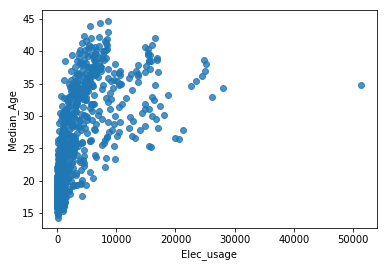

In [260]:
seaborn.regplot(x= "Elec_usage", y= "Median_Age", fit_reg= False, data= data)

In [262]:
print('association between Elec. usage pre person and Median Age')
print(scipy.stats.pearsonr(data['Elec_usage'], data['Median_Age']))

association between Elec. usage pre person and Median Age
(0.617638613515279, 7.588818646419762e-93)


# Bu kisim degisecek mesela coefficient positive
# Interpretation of the above result: The coefficient is negative. 
As we can see from the scatter plot above, mortality rate decreases as the GDP increases. However this correlation is not very strong. The p-value suggests that the computed coefficient is significant. 